In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
df=pd.read_csv("train.csv")
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [92]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [93]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [94]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [121]:
df['amenities']

0       -1.514216
1       -1.504183
2       -0.540758
3        0.337084
4        1.063026
           ...   
74106    1.537877
74107    0.327727
74108    1.304128
74109    0.781772
74110    1.454645
Name: amenities, Length: 73825, dtype: float64

In [95]:
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [96]:
le = LabelEncoder()
catcol = df.select_dtypes(include=['object','bool'])
for x in catcol:
    df[x] = le.fit_transform(df[x])

df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,0,0,6142,3,1.0,4,2,1,...,40.696524,-73.991617,10464,77,2,100.0,32398,195,1.0,1.0
1,6304928,5.129899,0,0,6269,7,1.0,4,2,1,...,40.766115,-73.989040,65672,252,6,93.0,16220,74,3.0,3.0
2,7919400,4.976734,0,0,21345,5,1.0,4,1,1,...,40.808110,-73.943756,66396,247,10,92.0,32852,84,1.0,3.0
3,13418779,6.620073,17,0,38854,4,1.0,4,0,1,...,37.772004,-122.431619,9387,325,0,NaN,33692,748,2.0,2.0
4,3808709,4.744932,0,0,55413,2,1.0,4,1,1,...,38.925627,-77.034596,32068,119,4,40.0,65883,341,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,0,1,67121,1,1.0,4,0,0,...,40.709025,-73.939405,72348,605,0,NaN,25229,203,1.0,1.0
74107,13281809,5.043425,0,0,38652,4,2.0,4,1,1,...,33.871549,-118.396053,59902,255,16,93.0,13695,515,2.0,4.0
74108,18688039,5.220356,0,0,61276,5,1.0,4,1,1,...,40.706749,-73.942377,43692,605,43,94.0,37484,203,2.0,2.0
74109,17045948,5.273000,0,0,48796,2,1.0,4,2,1,...,40.738535,-74.000157,26450,592,0,NaN,51019,61,0.0,2.0


In [97]:
catcol.columns

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'city', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'name', 'neighbourhood', 'thumbnail_url', 'zipcode'],
      dtype='object')

In [98]:
df['beds_and_baths'] = df['bedrooms'] + df['bathrooms']
corr = df.corr()
print(corr['log_price'])

id                       -0.007178
log_price                 1.000000
property_type             0.048741
room_type                -0.607125
amenities                 0.129984
accommodates              0.567574
bathrooms                 0.355420
bed_type                  0.093780
cancellation_policy       0.131869
cleaning_fee              0.111191
city                      0.030913
description              -0.027849
first_review             -0.013286
host_has_profile_pic     -0.011971
host_identity_verified    0.023433
host_response_rate        0.033320
host_since               -0.078517
instant_bookable         -0.044271
last_review               0.020271
latitude                 -0.002193
longitude                -0.047529
name                     -0.032571
neighbourhood             0.035344
number_of_reviews        -0.032470
review_scores_rating      0.091219
thumbnail_url             0.040068
zipcode                   0.020510
bedrooms                  0.473212
beds                

In [99]:
df.drop(columns=['room_type','bedrooms','bathrooms','beds','bed_type'],axis=1,inplace=True)


In [133]:
pt = PowerTransformer(method='yeo-johnson')

cols = (df.drop(columns=['log_price'],axis=1)).columns

for x in cols:
    df[x] = pt.fit_transform(df[[x]])


df.skew()

log_price               0.514421
property_type           0.686663
amenities              -0.053424
accommodates           -0.037450
cancellation_policy    -0.106183
cleaning_fee           -1.063451
city                    0.033927
host_response_rate      0.093719
instant_bookable        1.076492
name                   -0.053913
neighbourhood          -0.083401
number_of_reviews       0.026220
review_scores_rating   -0.061971
beds_and_baths         -0.152147
price_per_room          0.512497
dtype: float64

In [101]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
amenities                     0
accommodates                  0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review                  0
host_has_profile_pic          0
host_identity_verified        0
host_response_rate            0
host_since                    0
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating      16722
thumbnail_url                 0
zipcode                       0
beds_and_baths              286
dtype: int64

In [102]:
df.dropna(subset=['beds_and_baths'],inplace=True)

In [103]:
df['review_scores_rating'].fillna(float(int(df['review_scores_rating'].mean())),inplace=True)

C:\Users\kannan\AppData\Local\Temp\ipykernel_14140\3419146993.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_scores_rating'].fillna(float(int(df['review_scores_rating'].mean())),inplace=True)


In [104]:
df.isnull().sum()

id                        0
log_price                 0
property_type             0
amenities                 0
accommodates              0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
beds_and_baths            0
dtype: int64

In [105]:
df.drop(columns=['zipcode','latitude','longitude','thumbnail_url','last_review','id','description','first_review','host_has_profile_pic','host_identity_verified','host_since'],axis=1,inplace=True)

In [106]:
df['price_per_room'] = df['log_price']/df['beds_and_baths']

In [107]:
corr = df.corr()
print(corr['log_price'])

log_price               1.000000
property_type           0.047844
amenities               0.145105
accommodates            0.585888
cancellation_policy     0.132251
cleaning_fee            0.111150
city                    0.056434
host_response_rate      0.030151
instant_bookable       -0.044377
name                   -0.035586
neighbourhood           0.041020
number_of_reviews      -0.060096
review_scores_rating    0.079227
beds_and_baths          0.370106
price_per_room          0.247829
Name: log_price, dtype: float64


In [128]:
Xlabel = df.drop(columns=['log_price'],axis=1)
ylabel = df['log_price']



0        5.010635
1        5.129899
2        4.976734
3        6.620073
4        4.744932
           ...   
74106    4.605170
74107    5.043425
74108    5.220356
74109    5.273000
74110    4.852030
Name: log_price, Length: 73825, dtype: float64

Spllitting the data set


In [111]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xlabel,ylabel, test_size=0.30, random_state=101)

Train the Model by Using Randomforest Regressor

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(Xtrain, ytrain)


RandomForestRegressor()

In [114]:
predictval = rf.predict(Xtest)
predictval

array([5.24702407, 3.80666249, 4.55387689, ..., 6.10902412, 4.70048037,
       4.59511985])

In [115]:
rf.score(Xtest,ytest)

0.9969683478819454

In [116]:
# acc = cross_val_score(rf, Xlabel, ylabel, cv=KFold(n_splits=10, shuffle=True, random_state=42))
# print(acc)

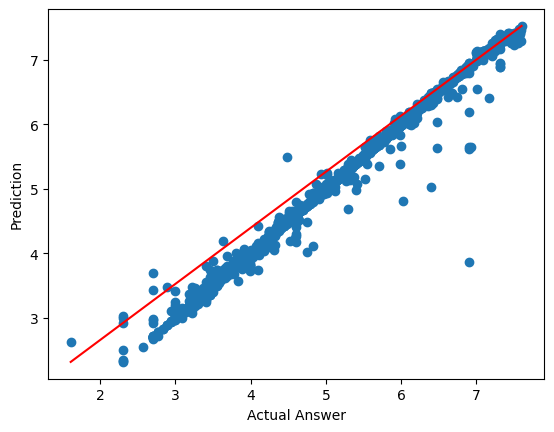

In [117]:
plt.scatter(ytest, predictval)
plt.xlabel('Actual Answer')
plt.ylabel('Prediction')
plt.plot([min(ytest),max(ytest)],[min(predictval),max(predictval)],color='red')

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [119]:
mse = mean_squared_error(ytest, predictval)
mae = mean_absolute_error(ytest, predictval)
r2 = r2_score(ytest, predictval)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.00156293056591705
Mean Absolute Error: 0.003634728630951434
R-squared: 0.9969683478819454


In [145]:
Xlabel.columns

Index(['property_type', 'amenities', 'accommodates', 'cancellation_policy',
       'cleaning_fee', 'city', 'host_response_rate', 'instant_bookable',
       'name', 'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'beds_and_baths', 'price_per_room'],
      dtype='object')

In [146]:
# Example predefined input values for each column
predefined_inputs = {
    'property_type': 2,              # Example encoded property type
    'amenities': 10,                 # Example number of amenities
    'accommodates': 4,               # Number of people accommodated
    'cancellation_policy': 1,        # Example encoded cancellation policy
    'cleaning_fee': 50.0,            # Example cleaning fee
    'city': 3,                       # Example encoded city
    'host_response_rate': 85.0,      # Host response rate as a percentage
    'instant_bookable': 1,           # Instant bookable: 1 = True, 0 = False
    'name': 5,                       # Example encoded name
    'neighbourhood': 7,              # Example encoded neighborhood
    'number_of_reviews': 120,        # Number of reviews
    'review_scores_rating': 90.0,    # Review score rating
    'beds_and_baths': 5,             # Sum of bedrooms and bathrooms
    'price_per_room': 100.0          # Price per room (log_price / beds_and_baths)
}

# Example function call with predefined inputs
def predict_log_price_from_predefined():
    input_data = pd.DataFrame(predefined_inputs, index=[0])

    # Assuming the transformer has been fit and model is trained
    cols_to_transform = ['accommodates', 'beds_and_baths', 'review_scores_rating', 'price_per_room']
    input_data[cols_to_transform] = pt.transform(input_data[cols_to_transform])

    prediction = rf.predict(input_data)
    return prediction[0]

# Call the function and print the prediction
predicted_log_price = predict_log_price_from_predefined()
print(f"The predicted log price for the predefined inputs is: {predicted_log_price}")


The predicted log price for the predefined inputs is: 7.472943567418269
